# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import data from files

In [2]:
plant1_generation = pd.read_csv("Data/Plant_1_Generation_Data.csv")
plant1_weather = pd.read_csv("Data/Plant_1_Weather_Sensor_Data.csv")
plant2_generation = pd.read_csv("Data/Plant_2_Generation_Data.csv")
plant2_weather = pd.read_csv("Data/Plant_2_Weather_Sensor_Data.csv")

# Short look on imported dataframes

In [3]:
plant1_generation.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [4]:
plant2_generation.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [5]:
plant1_weather.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [52]:
plant2_weather.head()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TIME,DATE
0,27.004764,25.060789,0.0,00:00,15-05-2020
1,26.880811,24.421869,0.0,00:15,15-05-2020
2,26.682055,24.427290,0.0,00:30,15-05-2020
3,26.500589,24.420678,0.0,00:45,15-05-2020
4,26.596148,25.088210,0.0,01:00,15-05-2020


# Dataframe preprocessing:
- change SOURCE_KEY to one symbol
- extract new columns - DATA and TIME from DATA_TIME
- delete unnecessary columns

In [7]:
keys1 = plant1_generation.SOURCE_KEY.unique()
keys2 = plant2_generation.SOURCE_KEY.unique()
values = ['A', 'B', 'C', 'D', 'E', 'F','G', 'H', 'I','J', 'K', 'L','M', 'N', 'O','P','Q', 'R', 'S','T', 'U', 'V']
change_names1 = dict(zip(keys1,values))
change_names2 = dict(zip(keys2,values))

In [8]:
plant1_generation.SOURCE_KEY.replace(change_names1, inplace = True)
plant1_weather.SOURCE_KEY.replace(change_names1, inplace = True)
plant2_generation.SOURCE_KEY.replace(change_names2, inplace = True)
plant2_weather.SOURCE_KEY.replace(change_names2, inplace = True)

In [9]:
# change date and time in generations
dat1 =  np.array([np.array(x) for x in plant1_generation.DATE_TIME.str.split(' ').values])
dat2 =  np.array([np.array(x) for x in plant2_generation.DATE_TIME.str.split(' ').values])

date1 = dat1[:,0]
time1 = dat1[:,1]
date2 = dat2[:,0]
time2 = dat2[:,1]

for i,date in enumerate(date2):
    split = date.split("-")
    date2[i] = "{}-{}-{}".format(split[2],split[1],split[0])
for i, time in enumerate(time2):
    time2[i] = time[:5]


plant1_generation["TIME"] = time1
plant2_generation["TIME"] = time2
plant1_generation["DATE"] = date1
plant2_generation["DATE"] = date2

In [10]:
# change date and time in wather
dat1 =  np.array([np.array(x) for x in plant1_weather.DATE_TIME.str.split(' ').values])
dat2 =  np.array([np.array(x) for x in plant2_weather.DATE_TIME.str.split(' ').values])

date1 = dat1[:,0]
time1 = dat1[:,1]
date2 = dat2[:,0]
time2 = dat2[:,1]

for i,date in enumerate(date1):
    split = date.split("-")
    date1[i] = "{}-{}-{}".format(split[2],split[1],split[0])
for i,date in enumerate(date2):
    split = date.split("-")
    date2[i] = "{}-{}-{}".format(split[2],split[1],split[0])
for i, time in enumerate(time1):
    time1[i] = time[:5]
for i, time in enumerate(time2):
    time2[i] = time[:5]


plant1_weather["TIME"] = time1
plant2_weather["TIME"] = time2
plant1_weather["DATE"] = date1
plant2_weather["DATE"] = date2

In [11]:
# removing unnecessary columns
plant1_weather.drop(['SOURCE_KEY','PLANT_ID','DATE_TIME'],1, inplace = True)
plant2_weather.drop(['SOURCE_KEY','PLANT_ID','DATE_TIME'],1, inplace = True)
plant1_generation.drop(['PLANT_ID','DATE_TIME'],1, inplace = True)
plant2_generation.drop(['PLANT_ID','DATE_TIME'],1, inplace = True)

# Change of column data types:
- TIME -> category
- DATE -> category
- SOURCE_KEY -> category

In [13]:
plants = [plant1_generation, plant1_weather, plant2_generation, plant2_weather]
usage1 = [sum(plant.memory_usage(deep = True)) for plant in plants]

plant1_generation.TIME = plant1_generation.TIME.astype("category")
plant1_generation.DATE = plant1_generation.DATE.astype("category")
plant1_generation.SOURCE_KEY = plant1_generation.SOURCE_KEY.astype("category")
plant2_generation.TIME = plant2_generation.TIME.astype("category")
plant2_generation.DATE = plant2_generation.DATE.astype("category")
plant2_generation.SOURCE_KEY = plant2_generation.SOURCE_KEY.astype("category")

plant1_weather.TIME = plant1_weather.TIME.astype("category")
plant1_weather.DATE = plant1_weather.DATE.astype("category")
plant2_weather.TIME = plant2_weather.TIME.astype("category")
plant2_weather.DATE = plant2_weather.DATE.astype("category")
    
usage2 = [sum(plant.memory_usage(deep = True)) for plant in plants]

# Calculating the amount of memory saved

In [14]:
sums = 0
for i in range(4):
    sums += usage1[i] - usage2[i]
print('{} bytes of memory were saved'.format(sums))
print('{0:.2f}% of memory was saved'.format(100*sums/sum(usage1)))


26423207 bytes of memory were saved
84.10% of memory was saved


# Daily production for inventer "I" on '17-06-2020' for plant 1

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000168C60EEEC8>,
      dtype=object)

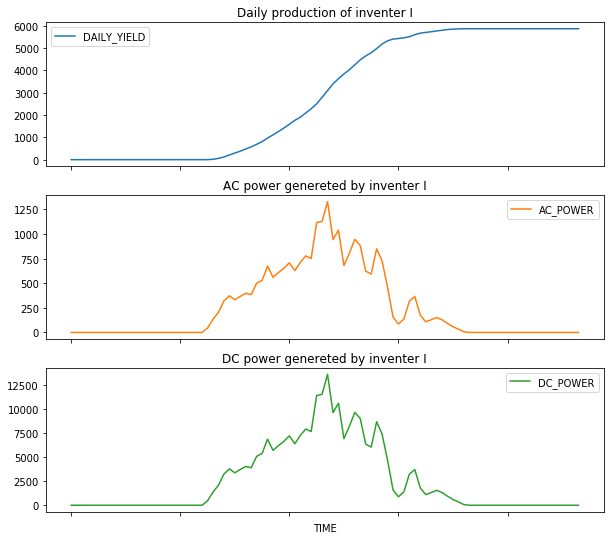

In [15]:
inventer = 'I'
cond1 = plant1_generation.SOURCE_KEY == inventer
cond2 = plant1_generation.DATE == '17-06-2020'
plant1_generation[cond1 & cond2].plot(x = "TIME", y = ["DAILY_YIELD", "AC_POWER", "DC_POWER"],
                            rot = 45, figsize = (10,10), subplots = True,
                            title = ["Daily production of inventer {}".format(inventer),"AC power genereted by inventer {}".format(inventer),
                                         "DC power genereted by inventer {}".format(inventer)])

# Daily DC power generated by inventer compared with irradation

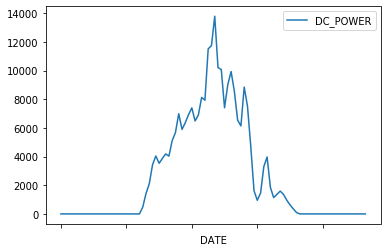

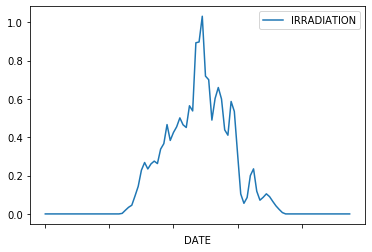

In [79]:
inventer = 'B'
date = '17-06-2020'

cond1 = plant1_generation.SOURCE_KEY == inventer
cond2 = plant1_generation.DATE == date
plant1_generation[cond1 & cond2].plot(x = "DATE", y = "DC_POWER")

cond1 = plant1_weather.DATE == date
plant1_weather[cond1].plot(x = "DATE", y= "IRRADIATION")

# Daily sum of DC power generated by the first power plant

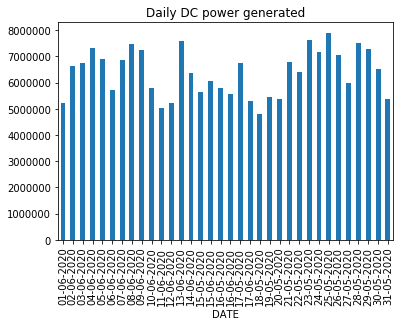

In [44]:
plant1_generation.groupby(by = "DATE").sum().DC_POWER.plot(kind = "bar", title = "Daily DC power generated by plant 1")

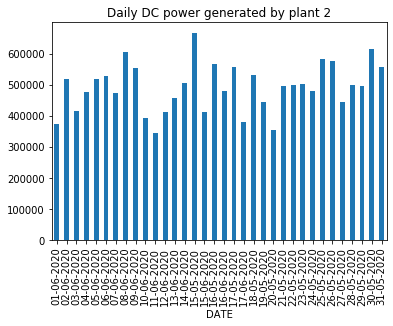

In [46]:
plant2_generation.groupby(by = "DATE").sum().DC_POWER.plot(kind = "bar", title = "Daily DC power generated by plant 2")

# Average temperature and irradation for each day
### Plant 1

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000168C8724408>,
      dtype=object)

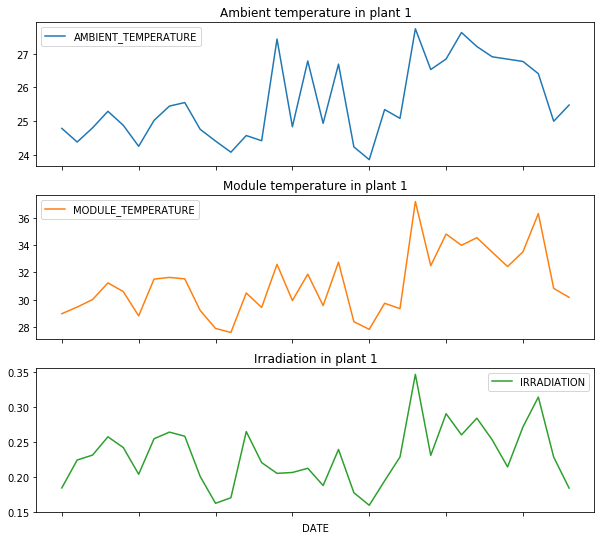

In [56]:
plant1_weather.groupby(by = "DATE").mean().plot(title = ["Ambient temperature in plant 1", "Module temperature in plant 1", "Irradiation in plant 1"],
                                               y = ["AMBIENT_TEMPERATURE","MODULE_TEMPERATURE","IRRADIATION"],
                                               figsize = (10,10),subplots = True)

### Plant 2

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000168CA4A0E08>,
      dtype=object)

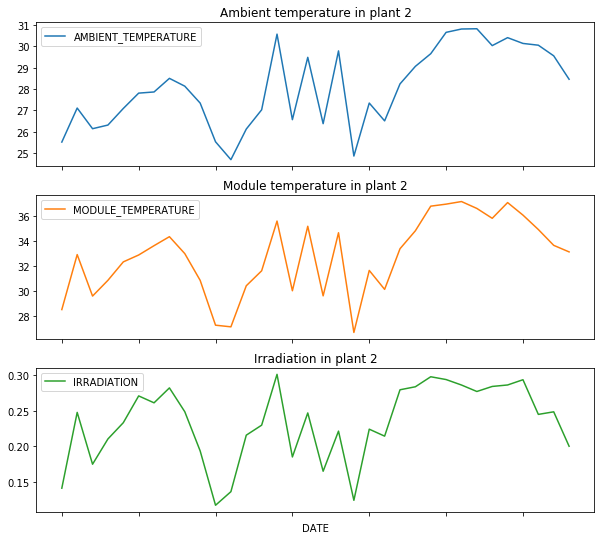

In [80]:
plant2_weather.groupby(by = "DATE").mean().plot(title = ["Ambient temperature in plant 2", "Module temperature in plant 2", "Irradiation in plant 2"],
                                               y = ["AMBIENT_TEMPERATURE","MODULE_TEMPERATURE","IRRADIATION"],
                                               figsize = (10,10),subplots = True)

# Build machine learning model to predict  DC power generation